# Computer vision Final project

## 2. Getting the dataset

In [1]:
!wget -nc http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
!tar -xf VOCtrainval_11-May-2009.tar --totals

voc_root_folder = "/content/VOCdevkit/VOC2009"

--2020-04-28 07:57:45--  http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935534080 (892M) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2009.tar’

VOCtrainval_11-May- 100%[===================>] 892.19M  13.7MB/s    in 68s     

2020-04-28 07:58:53 (13.2 MB/s) - ‘VOCtrainval_11-May-2009.tar’ saved [935534080/935534080]

Total bytes read: 935536640 (893MiB, 264MiB/s)


Build training(65%), validation(20%) and test(15%) sets from the data.

The data provided consists of a set of images; each image has an annotation file giving a bounding box and object class label for each object in one of the twenty classes present in the image. Multiple objects from multiple classes may be present in the same image.

A subset of images are also annotated with pixel-wise segmentation of each object present.

The segmentations are like this:
- Object segmentation:
pixel indices correspond to the first, second, third object etc.

- Class segmentation:
pixel indices correspond to classes in alphabetical order (1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle, 6=bus, 7=car , 8=cat, 9=chair, 10=cow, 11=diningtable, 12=dog, 13=horse, 14=motorbike, 15=person, 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor) 

In [2]:
import os
from sklearn.model_selection import train_test_split

root_path = "/content/VOCdevkit/VOC2009/"
images_path = root_path+"/JPEGImages/"
annotation_path = root_path+"/Annotations/"
class_segmentation_path = root_path+"SegmentationClass/"
object_segmentation_path = root_path+"SegmentationObject/"

# Get list of img ids
img_ids = [os.path.splitext(filename)[0] for filename in os.listdir(images_path)]
# Get list of ids of images prepared for segmentation
segmentation_ids = [os.path.splitext(filename)[0] for filename in os.listdir(class_segmentation_path)]

# Seed necessary to get the same datasets each time the cell is run
seed = 12374

# Training set = 65%, validation + test = 35%
train_ids, valtest = train_test_split(img_ids, test_size=0.35, random_state=seed)

# Validation = 20%, test = 15%
validation_ids, test_ids = train_test_split(valtest, test_size=0.43, random_state=seed)

# Only some images are prepared for segmentation, so the data subsets are filtered for this task
train_ids_segmentation = list(filter(lambda id: id in segmentation_ids, train_ids))
validation_ids_segmentation = list(filter(lambda id: id in segmentation_ids, validation_ids))
test_ids_segmentation = list(filter(lambda id: id in segmentation_ids, test_ids))

print(len(train_ids))
print(len(train_ids_segmentation))
train_ids_segmentation.sort()
print(train_ids_segmentation)

5081
984
['2007_000033', '2007_000042', '2007_000061', '2007_000063', '2007_000121', '2007_000123', '2007_000129', '2007_000170', '2007_000175', '2007_000187', '2007_000241', '2007_000250', '2007_000256', '2007_000323', '2007_000332', '2007_000333', '2007_000346', '2007_000363', '2007_000364', '2007_000392', '2007_000452', '2007_000464', '2007_000480', '2007_000491', '2007_000515', '2007_000549', '2007_000559', '2007_000572', '2007_000584', '2007_000629', '2007_000645', '2007_000648', '2007_000676', '2007_000713', '2007_000727', '2007_000733', '2007_000738', '2007_000783', '2007_000804', '2007_000822', '2007_000830', '2007_000837', '2007_000876', '2007_000904', '2007_000999', '2007_001027', '2007_001175', '2007_001239', '2007_001288', '2007_001299', '2007_001377', '2007_001397', '2007_001408', '2007_001416', '2007_001423', '2007_001430', '2007_001458', '2007_001526', '2007_001568', '2007_001585', '2007_001586', '2007_001587', '2007_001594', '2007_001595', '2007_001609', '2007_001677', 

## 3. Supervised, end-to-end learning

### 3.1 Classification 

### 3.2 Semantic segmentation

#### Preparing the data

First, we need to prepare our segmentation data. We divide it in three folder for the training, validation and test images.

In [0]:
from shutil import copyfile
import os 

# Prepare segmentation dataset
def move_images(imgs_path, segments_path, ids):
  for id in ids:
    image_filename = id + ".jpg"
    full_path_image = images_path + image_filename
    copyfile(full_path_image, imgs_path + image_filename)

    segment_filename = id + ".png"
    full_path_segment = class_segmentation_path + segment_filename
    copyfile(full_path_segment, segments_path + segment_filename)

# Train 
train_images_path = "/content/segmentation_dataset/train/images/"
os.makedirs(train_images_path, exist_ok=True)

train_segments_path = "/content/segmentation_dataset/train/segments/"
os.makedirs(train_segments_path, exist_ok=True)

move_images(train_images_path, train_segments_path, train_ids_segmentation)

# Validation
val_images_path = "/content/segmentation_dataset/val/images/"
os.makedirs(val_images_path, exist_ok=True)

val_segments_path = "/content/segmentation_dataset/val/segments/"
os.makedirs(val_segments_path, exist_ok=True)

move_images(val_images_path, val_segments_path, validation_ids_segmentation)

# Test
test_images_path = "/content/segmentation_dataset/test/images/"
os.makedirs(test_images_path, exist_ok=True)

test_segments_path = "/content/segmentation_dataset/test/segments/"
os.makedirs(test_segments_path, exist_ok=True)

move_images(test_images_path, test_segments_path, test_ids_segmentation)

#### 3.2.1 From scratch

We will implement a segmentation model following the "skip connections" approach.

https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html

https://github.com/divamgupta/image-segmentation-keras/blob/master/keras_segmentation/train.py

In [0]:
from lxml import etree
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np
import cv2
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import SGD, Adam
from keras import backend as K
from keras.models import Model



Using TensorFlow backend.


In [0]:
# parameters that you should set before running this script
voc_root_folder = "/content/VOCdevkit/"
image_size = 128    # image size that you will use for your network (input images will be resampled to this size), lower if you have troubles on your laptop (hint: use io.imshow to inspect the quality of the resampled images before feeding it into your network!)
img_rows, img_cols = image_size, image_size
n_channels = 3

In [0]:

codes = np.array(["background","aeroplane","bicycle","bird","boat","bottle","bus","car","cat","chair","cow","diningtable","dog","horse","motorbike","person","pottedplant","sheep","sofa","train","tvmonitor"])
 #(1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle, 6=bus, 7=car , 8=cat, 9=chair, 10=cow, 11=diningtable, 12=dog, 13=horse, 14=motorbike, 15=person, 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor)

In [0]:
# step1 - build list of filtered filenames
annotation_folder = os.path.join(voc_root_folder, "VOC2009/Annotations/")
annotation_files = os.listdir(annotation_folder)
filtered_filenames = []
for a_f in annotation_files:
    tree = etree.parse(os.path.join(annotation_folder, a_f))
    if np.any([tag.text == filt for tag in tree.iterfind("./name") for filt in filter]):
        filtered_filenames.append(a_f[:-4])

# step2 - build (x,y) for TRAIN/VAL (classification)
classes_folder = os.path.join(voc_root_folder, "VOC2009/ImageSets/Segmentation/")
classes_files = os.listdir(classes_folder)
seg_train_files = [os.path.join(classes_folder, c_f) for c_f in classes_files if 'train.txt' in c_f]
seg_val_files = [os.path.join(classes_folder, c_f) for c_f in classes_files if 'val.txt' in c_f]

In [0]:
print(seg_train_files)

['/content/VOCdevkit/VOC2009/ImageSets/Segmentation/train.txt']


In [0]:
seg_train_files

['/content/VOCdevkit/VOC2009/ImageSets/Segmentation/train.txt']

In [0]:
ann_files = [os.path.join(annotation_folder, a_f) for a_f in annotation_files]
columns = ['Filename','Fileid','Width','Height','Object_Name','Pose','Xmin','Ymin','Xmax','Ymax']
annotations_df = pd.DataFrame(columns=columns) #Each row corresponds to a segmented image
for ann_file in ann_files:
    tree = ET.parse(ann_file)
    root = tree.getroot()
    xmin,ymin,xmax,ymax = 0,0,0,0
    for elem in root:
        if elem.tag == 'filename':
            filename = elem.text
            fileid = filename[:10]
        if elem.tag == 'size':
            for e in elem:
                if e.tag == 'width':
                    width = e.text
                    #print(width)
                if e.tag == 'height':
                    height = e.text
                    #print(height)
        if elem.tag == 'object':
            for e in elem:
                if e.tag == 'name':
                    name = e.text
                if e.tag == 'pose':
                    pose = e.text
                   # print("pose",pose)
                if e.tag == 'bndbox':
                    for b in e:
                        if b.tag == 'xmin':
                            xmin = b.text
                        if b.tag == 'ymin':
                            ymin = b.text
                        if b.tag == 'xmax':
                            xmax = b.text
                        if b.tag == 'ymax':
                            ymax = b.text
                    df = pd.DataFrame([[filename,fileid,width,height,name,pose,xmin,ymin,xmax,ymax]],columns = columns)
                    annotations_df = annotations_df.append(df)
    

"\nannotations_df.reset_index(drop=True,inplace=True)\nannotations_df.to_csv('annotations_df.csv')\nprint(annotations_df.shape)\nannotations_df.head()\n"

In [0]:
annotations_df.reset_index(drop=True,inplace=True)
annotations_df.to_csv('annotations_df.csv')
print(annotations_df.shape)
annotations_df.head()  

(21544, 10)


Filename      Fileid Width Height  ... Xmin Ymin Xmax Ymax
0  2009_003233.jpg  2009_00323   500    375  ...  111  103  441  214
1  2008_006039.jpg  2008_00603   500    375  ...    1  144  385  375
2  2008_006039.jpg  2008_00603   500    375  ...    1  137  117  303
3  2008_006039.jpg  2008_00603   500    375  ...   47   76  155  242
4  2008_006039.jpg  2008_00603   500    375  ...  117   77  195  238

[5 rows x 10 columns]

In [0]:
#Training
image_path = os.path.join(voc_root_folder, "VOC2009/JPEGImages/")
segmentation_classes_path = os.path.join(voc_root_folder, "VOC2009/SegmentationClass/")

file = open(seg_train_files[0], 'r') 
seg_train_filenames = file.read().splitlines()

seg_train_images = []
segmented_images = []
grayscale_images = []
binary_segmented_images = []
for img_name in seg_train_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the images
    seg_train_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the segments
    segmented_images.append(seg_img)
    
    #Gray scale image of the original image
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayscale_img = cv2.cvtColor(grayscale_img, cv2.COLOR_GRAY2BGR)
    grayscale_images.append(grayscale_img)
    
    #Group the objects into one intensity and do binary image segmentation
    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)

segmentation_class_train_df = pd.DataFrame()
segmentation_class_train_df['Image_Name'] = seg_train_filenames
segmentation_class_train_df['Image_Array'] = seg_train_images
segmentation_class_train_df['Segmented_Image_Array'] = segmented_images
segmentation_class_train_df['Grayscale_Image_Array'] = grayscale_images
segmentation_class_train_df['Binary_Segmented_Image_Array'] = binary_segmented_images

segmentation_class_train_df = segmentation_class_train_df.sample(frac=1) #Shuffle the rows so different classes are mixed
segmentation_class_train_df.reset_index(drop=True,inplace=True)
print('Saving training images')
#segmentation_class_train_df.to_pickle('X_Train_Segmentation_'+str(img_rows)+'.pkl') #Save the dataframe to pickle
print('Saved ' + str(segmentation_class_train_df.shape[0]) + ' images')

print(segmentation_class_train_df.shape)
segmentation_class_train_df.head()

Saving training images
Saved 749 images
(749, 5)


Image_Name  ...                       Binary_Segmented_Image_Array
0  2008_008193  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  2009_001735  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  2007_007250  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3  2009_001443  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2007_005702  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[5 rows x 5 columns]

In [0]:
image_path = os.path.join(voc_root_folder, "VOC2009/JPEGImages/")
segmentation_classes_path = os.path.join(voc_root_folder, "VOC2009/SegmentationClass/")

file = open(seg_train_files[0], 'r') 
seg_train_filenames = file.read().splitlines()

seg_train_images = []
segmented_images = []
grayscale_images = []
binary_segmented_images = []
for img_name in seg_train_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the images
    seg_train_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the segments
    segmented_images.append(seg_img)
    
    #Gray scale image of the original image
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayscale_img = cv2.cvtColor(grayscale_img, cv2.COLOR_GRAY2BGR)
    grayscale_images.append(grayscale_img)
    
    #Group the objects into one intensity and do binary image segmentation
    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)

segmentation_class_train_df = pd.DataFrame()
segmentation_class_train_df['Image_Name'] = seg_train_filenames
segmentation_class_train_df['Image_Array'] = seg_train_images
segmentation_class_train_df['Segmented_Image_Array'] = segmented_images
segmentation_class_train_df['Grayscale_Image_Array'] = grayscale_images
segmentation_class_train_df['Binary_Segmented_Image_Array'] = binary_segmented_images

segmentation_class_train_df = segmentation_class_train_df.sample(frac=1) #Shuffle the rows so different classes are mixed
segmentation_class_train_df.reset_index(drop=True,inplace=True)
print('Saving training images')
#segmentation_class_train_df.to_pickle('X_Train_Segmentation_'+str(img_rows)+'.pkl') #Save the dataframe to pickle
print('Saved ' + str(segmentation_class_train_df.shape[0]) + ' images')

print(segmentation_class_train_df.shape)
segmentation_class_train_df.head()

Saving training images
Saved 749 images
(749, 5)


Image_Name  ...                       Binary_Segmented_Image_Array
0  2007_006004  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  2007_002488  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  2007_001724  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3  2007_001872  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2009_001782  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[5 rows x 5 columns]

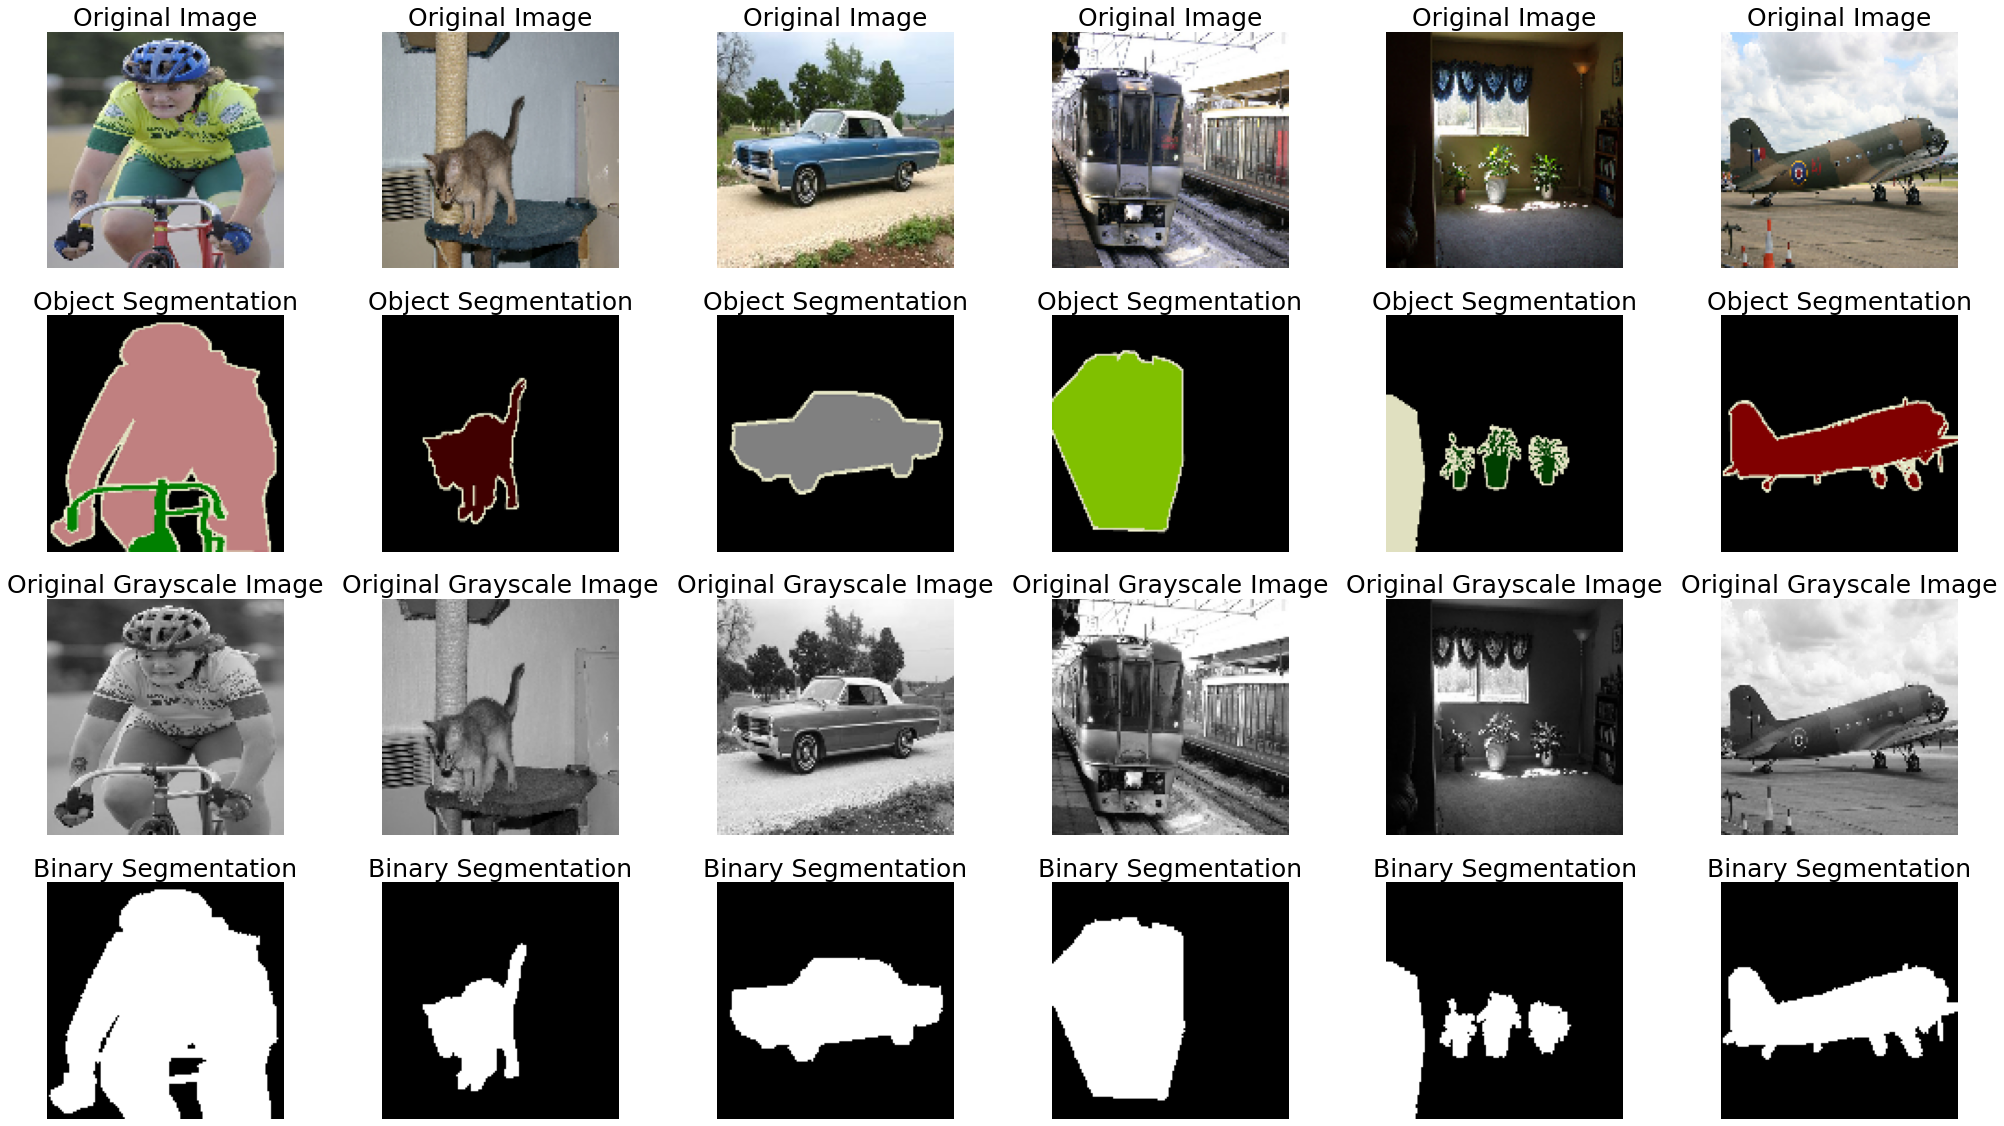

In [0]:

random_indices = [random.randint(0, segmentation_class_train_df.shape[0]) for i in range(6)] 
fig = plt.figure(figsize=(35,20))
ax = fig.subplots(4, 6)
i=0
for index in random_indices:
    actual = segmentation_class_train_df.iloc[index]['Image_Array']
    segmented = segmentation_class_train_df.iloc[index]['Segmented_Image_Array']
    actual_grayscale = segmentation_class_train_df.iloc[index]['Grayscale_Image_Array']
    binary_segmented = segmentation_class_train_df.iloc[index]['Binary_Segmented_Image_Array']
    ax[0,i].imshow(actual)
    ax[0,i].axis('off')
    ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[1,i].imshow(segmented)
    ax[1,i].axis('off')
    ax[1,i].set_title('Object Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[2,i].imshow(actual_grayscale)
    ax[2,i].axis('off')
    ax[2,i].set_title('Original Grayscale Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[3,i].imshow(binary_segmented, cmap='gray')
    ax[3,i].axis('off')
    ax[3,i].set_title('Binary Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    i = i+1
plt.show()

In [0]:
#Validation images
file = open(seg_val_files[0], 'r') 
temp_filenames = file.read().splitlines()
seg_val_filenames = [f_n for f_n in temp_filenames if f_n not in seg_train_filenames]

seg_val_images = []
segmented_images = []
grayscale_images = []
binary_segmented_images = []
for img_name in seg_val_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the images
    seg_val_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) #Resize the segments
    segmented_images.append(seg_img)
    
    #Gray scale image of the original image
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayscale_img = cv2.cvtColor(grayscale_img, cv2.COLOR_GRAY2BGR)
    grayscale_images.append(grayscale_img)
    
    #Group the objects into one intensity and do binary image segmentation    
    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)
    
segmentation_class_val_df = pd.DataFrame()
segmentation_class_val_df['Image_Name'] = seg_val_filenames
segmentation_class_val_df['Image_Array'] = seg_val_images
segmentation_class_val_df['Segmented_Image_Array'] = segmented_images
segmentation_class_val_df['Grayscale_Image_Array'] = grayscale_images
segmentation_class_val_df['Binary_Segmented_Image_Array'] = binary_segmented_images

segmentation_class_val_df = segmentation_class_val_df.sample(frac=1) #Shuffle the rows so different classes are mixed
segmentation_class_val_df.reset_index(drop=True,inplace=True)

#Divide the validation data into two equal halves - one for validation and other for test
segmentation_class_test_df = segmentation_class_val_df[np.int(segmentation_class_val_df.shape[0]/2):]  #Contains the test image (375 segmented images)
segmentation_class_test_df.reset_index(drop=True,inplace=True)
print(segmentation_class_test_df.shape)

segmentation_class_val_df = segmentation_class_val_df[:np.int(segmentation_class_val_df.shape[0]/2)]   #Contains the validation image (375 segmented images)
segmentation_class_val_df.reset_index(drop=True,inplace=True)
print(segmentation_class_val_df.shape)

print('Saving validation images')
#segmentation_class_val_df.to_pickle('X_Val_Segmentation_'+str(img_rows)+'.pkl') #Save the dataframe to pickle
print('Saved ' + str(segmentation_class_val_df.shape[0]) + ' images')
print(segmentation_class_val_df.shape)
segmentation_class_val_df.head()

(375, 5)
(375, 5)
Saving validation images
Saved 375 images
(375, 5)


Image_Name  ...                       Binary_Segmented_Image_Array
0  2008_003976  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  2008_000943  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  2007_002728  ...  [[[255, 255, 255], [255, 255, 255], [255, 255,...
3  2009_004801  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2008_004453  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[5 rows x 5 columns]

In [0]:
#Testing images
print('Saving test images')
#segmentation_class_test_df.to_pickle('X_Test_Segmentation_'+str(img_rows)+'.pkl') #Save the dataframe to pickle
print('Saved ' + str(segmentation_class_test_df.shape[0]) + ' images')
print(segmentation_class_test_df.shape)
segmentation_class_test_df.head()

Saving test images
Saved 375 images
(375, 5)


Image_Name  ...                       Binary_Segmented_Image_Array
0  2009_004801  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  2007_006035  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  2009_005189  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3  2008_002273  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2009_000989  ...  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[5 rows x 5 columns]

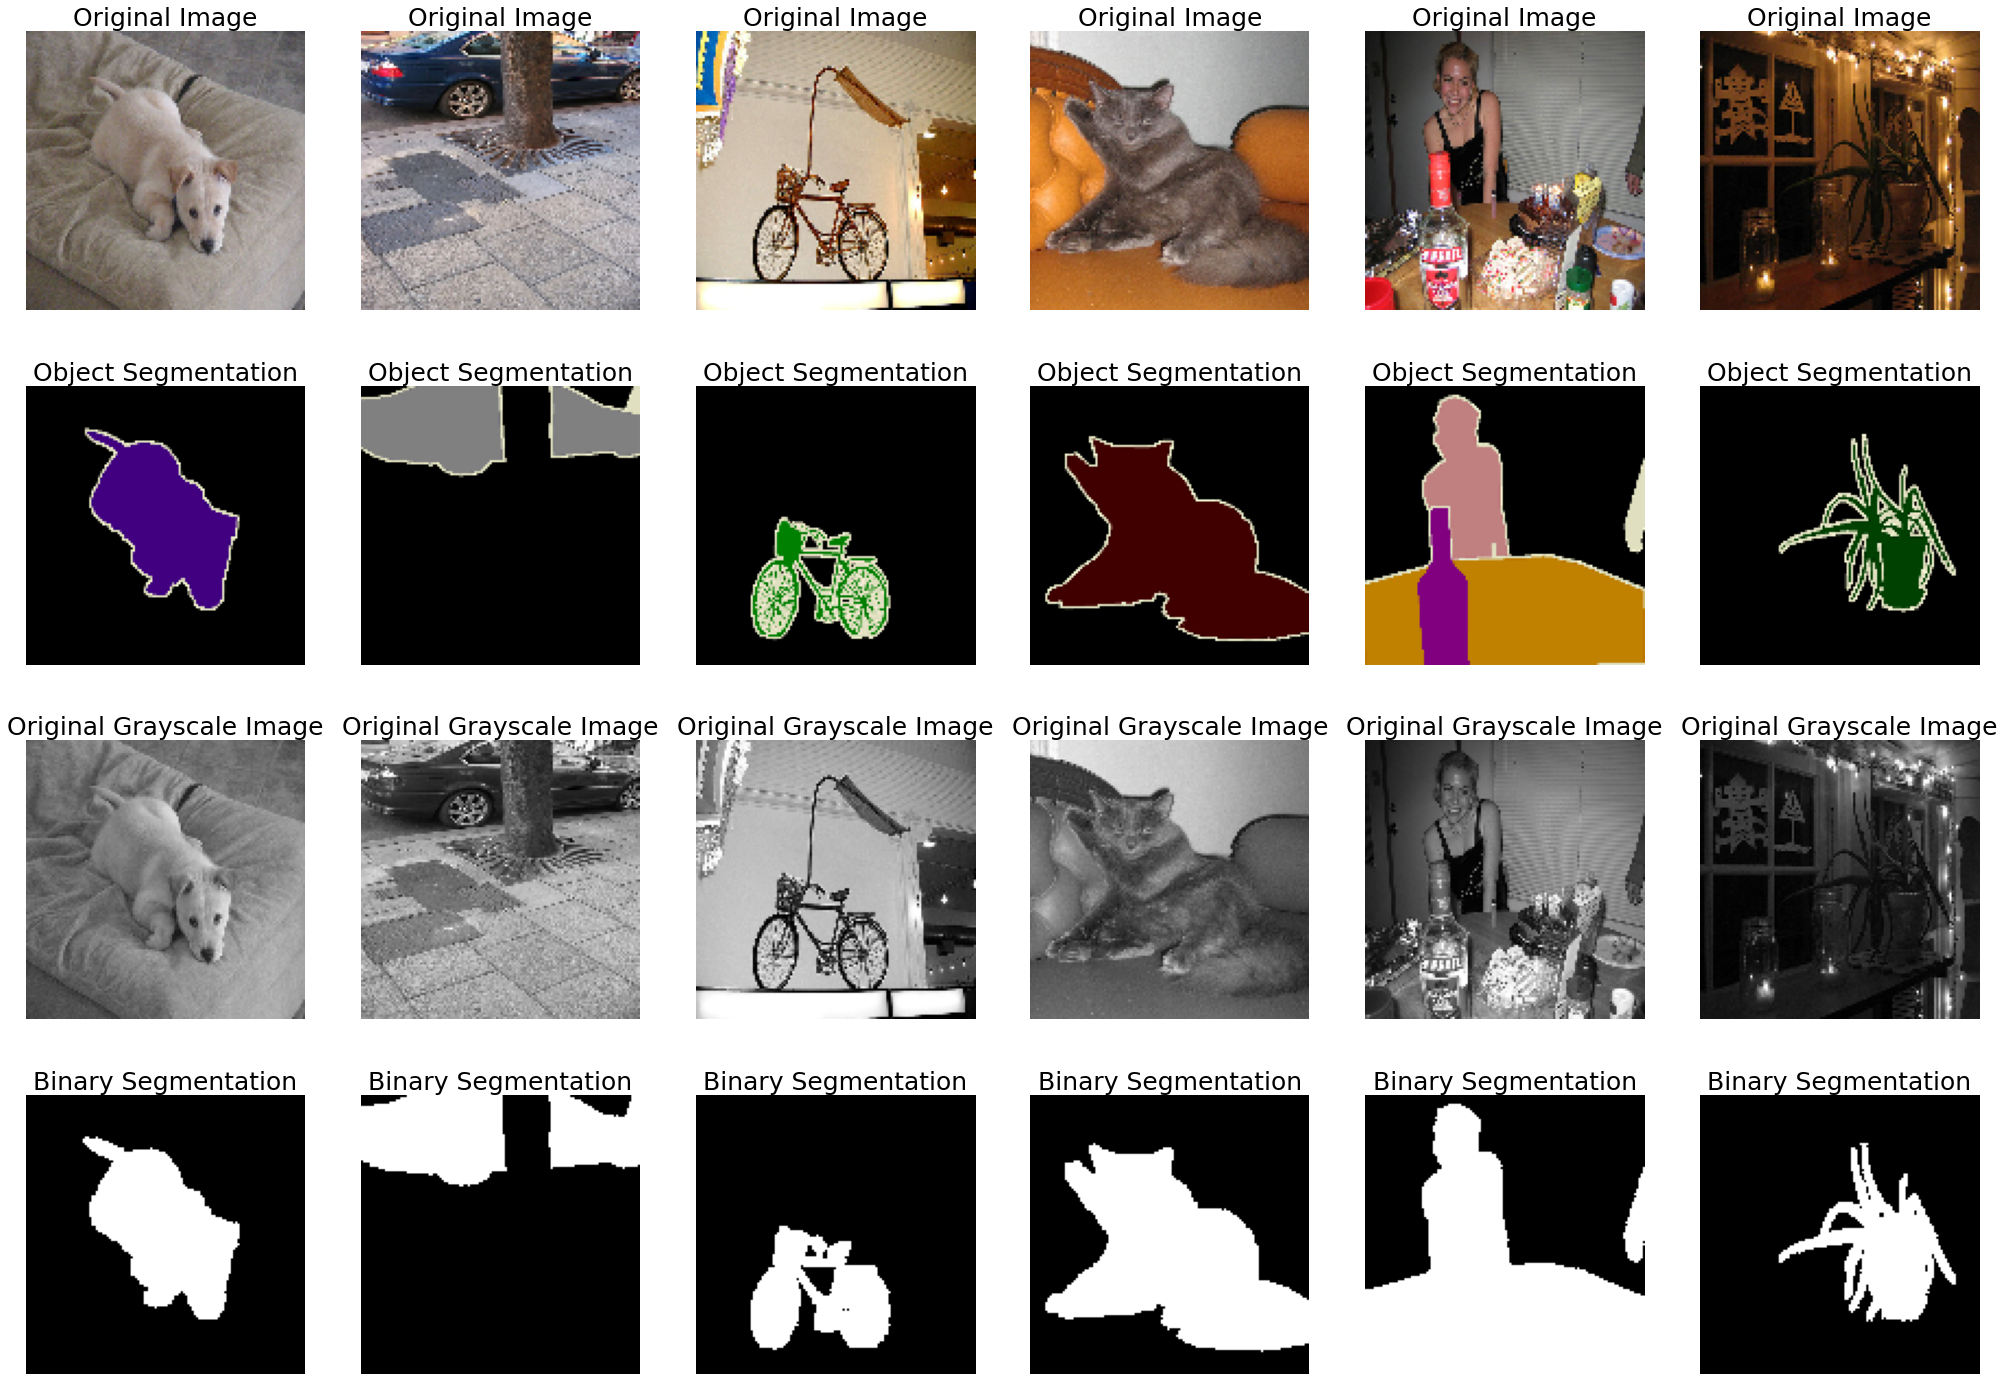

In [0]:
random_indices = [random.randint(0, segmentation_class_val_df.shape[0]) for i in range(6)] 
fig = plt.figure(figsize=(35,25))
ax = fig.subplots(4, 6)
i=0
for index in random_indices:
    actual = segmentation_class_val_df.iloc[index]['Image_Array']
    segmented = segmentation_class_val_df.iloc[index]['Segmented_Image_Array']
    actual_grayscale = segmentation_class_val_df.iloc[index]['Grayscale_Image_Array']
    binary_segmented = segmentation_class_val_df.iloc[index]['Binary_Segmented_Image_Array']
    ax[0,i].imshow(actual)
    ax[0,i].axis('off')
    ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[1,i].imshow(segmented)
    ax[1,i].axis('off')
    ax[1,i].set_title('Object Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[2,i].imshow(actual_grayscale)
    ax[2,i].axis('off')
    ax[2,i].set_title('Original Grayscale Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[3,i].imshow(binary_segmented, cmap='gray')
    ax[3,i].axis('off')
    ax[3,i].set_title('Binary Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    i = i+1
plt.show()

In [0]:
#Metrics for Keras
from keras import backend as K
from keras.losses import binary_crossentropy
  
#Dice Score Metric
def dice_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
  
#Dice Score Loss
def dice_p_bce(in_gt, in_pred):
    return 0.0*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)

#Jaccard Score Metric
def jaccard_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (intersection + smooth) / (union + smooth), axis=0)   

In [0]:
#segmentation_class_train_df = pd.read_pickle('X_Train_Segmentation_128.pkl')
#segmentation_class_val_df = pd.read_pickle('X_Val_Segmentation_128.pkl')
#segmentation_class_test_df = pd.read_pickle('X_Test_Segmentation_128.pkl')

x_train = np.array(segmentation_class_train_df['Image_Array'].values.tolist())
print(x_train.shape)
x_train_grayscale = np.array(segmentation_class_train_df['Grayscale_Image_Array'].values.tolist())
print(x_train_grayscale.shape)
y_train = np.array(segmentation_class_train_df['Binary_Segmented_Image_Array'].values.tolist())
print(y_train.shape)

x_val = np.array(segmentation_class_val_df['Image_Array'].values.tolist())
print(x_val.shape)
x_val_grayscale = np.array(segmentation_class_val_df['Grayscale_Image_Array'].values.tolist())
print(x_val_grayscale.shape)
y_val = np.array(segmentation_class_val_df['Binary_Segmented_Image_Array'].values.tolist())
print(y_val.shape)

x_test = np.array(segmentation_class_test_df['Image_Array'].values.tolist())
print(x_test.shape)
x_test_grayscale = np.array(segmentation_class_test_df['Grayscale_Image_Array'].values.tolist())
print(x_test_grayscale.shape)
y_test = np.array(segmentation_class_test_df['Binary_Segmented_Image_Array'].values.tolist())
print(y_test.shape)

(749, 128, 128, 3)
(749, 128, 128, 3)
(749, 128, 128, 3)
(375, 128, 128, 3)
(375, 128, 128, 3)
(375, 128, 128, 3)
(375, 128, 128, 3)
(375, 128, 128, 3)
(375, 128, 128, 3)


In [0]:
#CONV Auto-encoder like structure for pixelwise classification
n_epochs = 2
n_batches = 256
#Run on Google Colab. Takes time

input_img = Input(shape=(img_rows, img_cols, n_channels))
layer = Conv2D(64, (3, 3), padding='same')(input_img)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2), padding='same')(layer)
layer = Conv2D(32, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2), padding='same')(layer)
layer = Conv2D(16, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
encoded = MaxPooling2D((2, 2), padding='same', name='code')(layer)

layer = Conv2D(16, (3, 3), padding='same')(encoded)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(32, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(64, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(3, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
decoded = Activation('sigmoid')(layer)

binary_segmenter_model = Model(input_img, decoded)
print(binary_segmenter_model.summary())
binary_segmenter_model.compile(optimizer='adam', loss=[dice_coef]) #Try with other optimizers like 'adadelta'
#binary_crossentropy loss function provided a better iou & dice score than cosine_proximity or logcosh
#With default metrics, I got a better performance

history = binary_segmenter_model.fit(x_train, y_train,epochs=n_epochs,batch_size=n_batches,verbose=1,
                                     validation_data=(x_val, y_val),shuffle=True)

# serialize model to JSON
model_json = binary_segmenter_model.to_json()
with open("binary_segmenter_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
binary_segmenter_model.save_weights("binary_segmenter_model.h5")
with open('binary_segmenter_model_history_dict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

print("Saved model & history to disk")


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation_15 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 32)        128 

In [0]:
#load json and create model
json_file = open('binary_segmenter_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
binary_segmenter_model = model_from_json(loaded_model_json)
# load weights into new model
binary_segmenter_model.load_weights("binary_segmenter_model.h5")
print("Loaded model from disk")
binary_segmenter_model.summary()

Loaded model from disk
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation_15 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_16 (Batc (None, 

In [0]:

history = pd.read_pickle('binary_segmenter_model_history_dict')
loss = history['loss']
val_loss = history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


EOFError: ignored

Mean IoU score on the test set is: 0.37667440594417684
Mean Dice score on the test set is: 0.8286716802343587


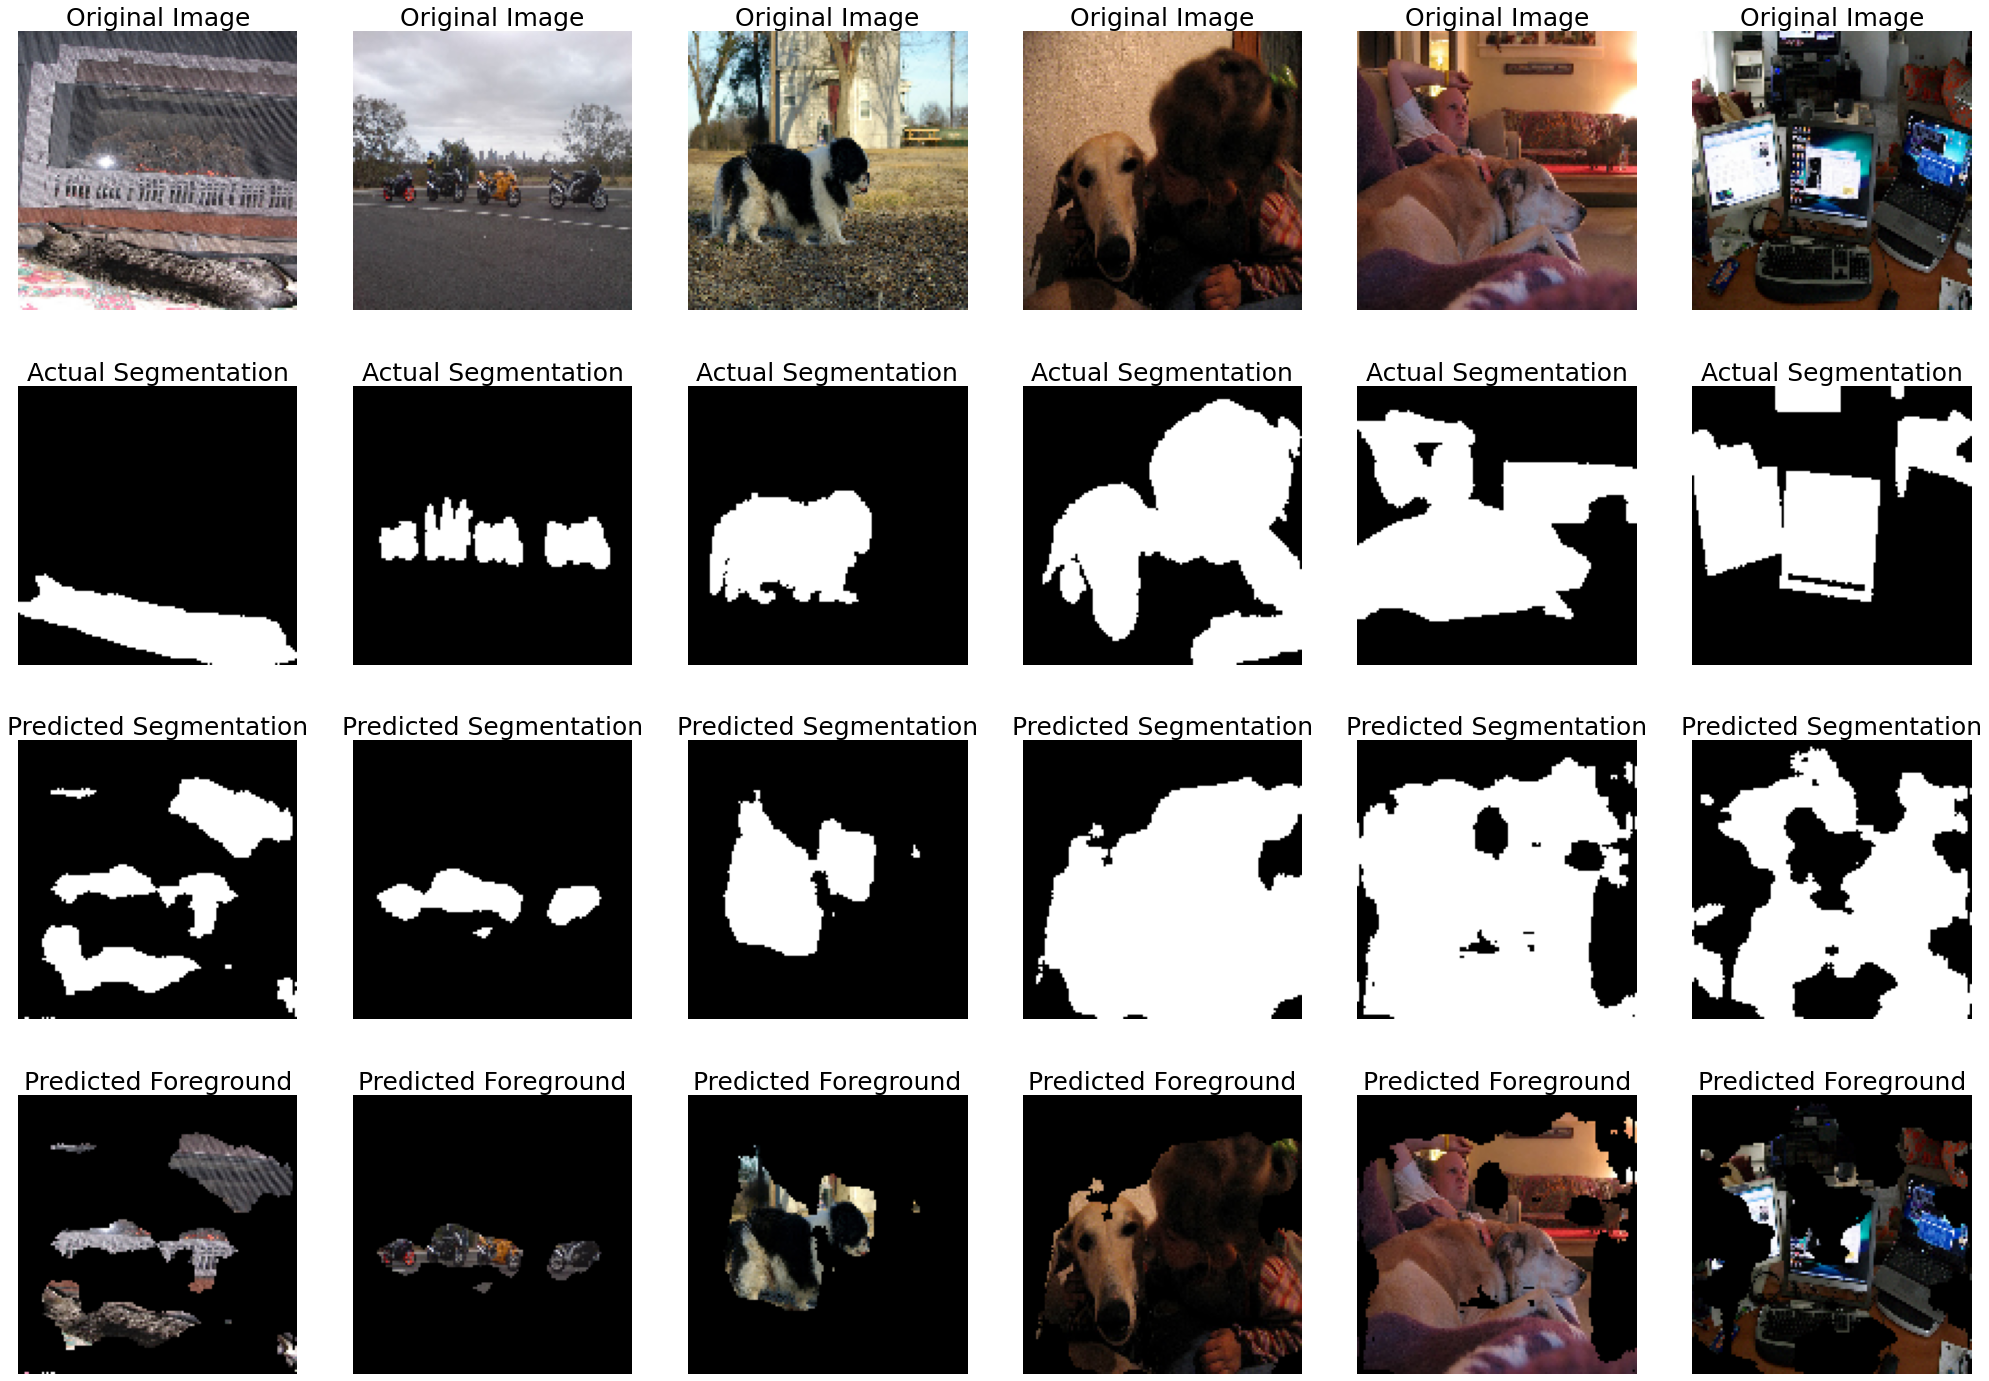

In [0]:
y_test_predict = binary_segmenter_model.predict(x_test)

y_test_predict_list = []
iou_scores_list = []
dice_scores_list = []
for i in range(len(y_test_predict)):
    y_test_pred_i = cv2.cvtColor(y_test_predict[i], cv2.COLOR_BGR2GRAY)
    y_test_pred_i = 255*((y_test_pred_i<=0.5).astype('uint8'))
    y_test_pred_i = cv2.cvtColor(y_test_pred_i, cv2.COLOR_GRAY2BGR)
    y_test_predict_list.append(y_test_pred_i)

    actual = y_test[i]
    predicted = y_test_pred_i
    axes = tuple(range(1, len(y_test_pred_i.shape)-1)) 

    intersection = np.logical_and(actual, predicted)
    union = np.logical_or(actual, predicted)
    iou_score = np.sum(intersection) / np.sum(union)
    iou_scores_list.append(iou_score)


    numerator = 2. * np.sum(predicted * actual, axes)
    denominator = np.sum(np.square(predicted) + np.square(actual), axes)
    dice_score =  1 - np.mean(numerator / (denominator+100)) # average over classes and batch
    dice_scores_list.append(dice_score)
  
y_test_predict = np.array(y_test_predict_list)

print('Mean IoU score on the test set is: ' + str(np.mean(iou_scores_list)))
print('Mean Dice score on the test set is: ' + str(np.mean(dice_scores_list)))

random_indices = [random.randint(0, segmentation_class_val_df.shape[0]) for i in range(6)] 
random_indices = [126, 216, 58, 166, 132, 50]
fig = plt.figure(figsize=(35,25))
ax = fig.subplots(4, 6)
i=0

for index in random_indices:
    actual_image = x_test[index]
    segmented_image = y_test[index]
    predicted_segmented_image = y_test_predict[index]
    
    ax[0,i].imshow(actual_image, cmap='gray')
    ax[0,i].axis('off')
    ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[1,i].imshow(segmented_image)
    ax[1,i].axis('off')
    ax[1,i].set_title('Actual Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[2,i].imshow(predicted_segmented_image, cmap='gray')
    ax[2,i].axis('off')
    ax[2,i].set_title('Predicted Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    ax[3,i].imshow(cv2.subtract(actual_image,255-predicted_segmented_image))
    ax[3,i].axis('off')
    ax[3,i].set_title('Predicted Foreground', fontdict={'fontsize': 25, 'fontweight': 'medium'})
    i = i+1

plt.show()

#### 3.2.2 Using transfer learning

##### Predicting using a pretrained model (A)

###### Pre-processing the data

In [0]:
from os import listdir
import cv2
import numpy as np
import tensorflow as tf

def load_train_data():

  # Format segment images to comply with the segmentation library specs
  # The pixel values indicate the class(not the pixel indices as in the original dataset)
  # Pixel values of every class
  # 23 classes in total -> 20 object classes + background + unlabeled + separation line
  palette = [[0, 0, 0], #background
             
              [0, 0, 64],
              [0, 0, 128],
              [0, 0, 192],
              [0, 64, 0],
              [0, 128, 0],
              [0, 192, 0],
              [0, 64, 128],
              [0, 128, 64],
              [0, 128, 128],
              [0, 128, 192],
              [0, 192, 128],
              [128, 0, 0],
              [128, 0, 64],
              [128, 0, 128],
              [128, 0, 192],
              [128, 64, 0],
              [128, 128, 0],
              [128, 128, 64],
              [128, 128, 128],
              [128, 128, 192],
             
              [192, 224, 224], # separating line
              [255, 255, 255]] # unlabelled

  dim = 224

  print("Formatting training dataset...")

  n = 1
  total = len(listdir(train_segments_path))
  x_train = []
  y_train = []
  for f in listdir(train_segments_path):
    print(str(n) + "/" + str(total))

    # Image
    img = cv2.imread(train_images_path + f[:-3] + "jpg")
    if(img.shape[0] < dim or img.shape[1] < dim):
      continue
    img = img[0:dim, 0:dim]
    x_train.append(img)

    # Segment
    segment = cv2.imread(train_segments_path + f)
    segment = segment[0:dim, 0:dim]
    one_hot_map = []
    for colour in palette:
        class_map = tf.reduce_all(tf.equal(segment, colour), axis=-1)
        one_hot_map.append(class_map)
    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.float32)
    y_train.append(one_hot_map.numpy())
    n += 1

  x_train = np.array(x_train)
  y_train = np.array(y_train)

  print("Done!")


  print("Formatting validation dataset...")

  n = 1
  total = len(listdir(val_segments_path))
  x_val = []
  y_val = []
  for f in listdir(val_segments_path):
    print(str(n) + "/" + str(total))

    # Image
    img = cv2.imread(val_images_path + f[:-3] + "jpg")
    if(img.shape[0] < dim or img.shape[1] < dim):
      continue
    img = img[0:dim, 0:dim]
    x_val.append(img)

    # Segment
    segment = cv2.imread(val_segments_path + f)
    segment = segment[0:dim, 0:dim]
    one_hot_map = []
    for colour in palette:
        class_map = tf.reduce_all(tf.equal(segment, colour), axis=-1)
        one_hot_map.append(class_map)
    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.float32)
    y_val.append(one_hot_map.numpy())
    n += 1

  x_val = np.array(x_val)
  y_val = np.array(y_val)

  return x_train, y_train, x_val, y_val

  print("Done!")

In [0]:
import cv2
import numpy as np
from os import listdir

def load_test_data():
  dim = 224
  x_test = []
  y_test = []
  y_test_f = []
  
  for name in listdir(test_images_path):
    img = cv2.imread(test_images_path + name)
    if(img.shape[0] < dim or img.shape[1] < dim):
      continue
    img = img[0:dim, 0:dim]

    x_test.append(img)

    segment_name = name[:-3] + "png"
    segment = cv2.imread(test_segments_path + segment_name)
    segment = segment[0:dim, 0:dim]
    y_test.append(segment)

    one_hot_map = []
    for colour in palette:
        class_map = tf.reduce_all(tf.equal(segment, colour), axis=-1)
        one_hot_map.append(class_map)
    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.float32)
    y_test_f.append(one_hot_map.numpy())

  return np.array(x_test), np.array(y_test), np.array(y_test_f)

In [0]:
# load data
x_train, y_train, x_val, y_val = load_train_data()

Formatting training dataset...
1/984
2/984
3/984
4/984
5/984
6/984
7/984
8/984
9/984
10/984
11/984
11/984
12/984
13/984
14/984
15/984
16/984
17/984
18/984
18/984
19/984
20/984
21/984
22/984
23/984
24/984
25/984
26/984
27/984
28/984
29/984
30/984
31/984
32/984
33/984
34/984
35/984
36/984
37/984
38/984
39/984
40/984
41/984
42/984
43/984
44/984
45/984
46/984
47/984
48/984
49/984
50/984
51/984
52/984
53/984
54/984
55/984
56/984
57/984
58/984
59/984
60/984
61/984
62/984
63/984
64/984
65/984
66/984
67/984
68/984
69/984
70/984
71/984
72/984
73/984
74/984
75/984
76/984
77/984
78/984
79/984
80/984
80/984
81/984
82/984
83/984
84/984
85/984
86/984
87/984
88/984
89/984
90/984
91/984
92/984
93/984
94/984
95/984
96/984
97/984
98/984
99/984
100/984
101/984
102/984
103/984
104/984
105/984
106/984
107/984
108/984
109/984
110/984
111/984
112/984
113/984
114/984
115/984
116/984
117/984
118/984
119/984
120/984
121/984
122/984
123/984
124/984
125/984
126/984
127/984
128/984
129/984
130/984
131/984
132/984


###### Building and training the model

In [4]:
 !pip install segmentation-models
 !pip show segmentation-models

Name: segmentation-models
Version: 1.0.1
Summary: Image segmentation models with pre-trained backbones with Keras.
Home-page: https://github.com/qubvel/segmentation_models
Author: Pavel Yakubovskiy
Author-email: qubvel@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: efficientnet, image-classifiers, keras-applications
Required-by: 


In [0]:
import segmentation_models as sm
from segmentation_models.metrics import iou_score, f1_score
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint
from keras import optimizers
import pickle 

# define model
# try softmax/sigmoid -> softmax
# try without nesterov -> bad
# try adam/sgd -> adam converges much faster, but it is also wrong
# try normalized -> worse
# try dice/categoricalCE -> categorical
# resnet18 + adam + linknet + categorical_loss + 15 epochs -> best so far

# try data augmentation

# define backbone of the model
BACKBONE = 'resnet18'
preprocess_input = sm.get_preprocessing(BACKBONE)

# preprocess input
x_train_f = preprocess_input(x_train)
x_val_f = preprocess_input(x_val)

# define loss function
categorical_loss = sm.losses.CategoricalCELoss() 

# define and compile the model
model = sm.Unet(BACKBONE, classes=23, activation='softmax', encoder_weights='imagenet')
model.compile(
    'Adam',
    loss=categorical_loss,
    metrics=[categorical_accuracy],
  )

# visualize model architecture
model.summary()

# weights checkpoint
filepath="/content/TL-model-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

# fit model
history = model.fit(
   x=x_train_f,
   y=y_train,
   batch_size=16,
   epochs=50,
   validation_data=(x_val_f, y_val),
   callbacks=callbacks_list,
)

# serialize model to JSON
model_json = model.to_json()
with open("/content/TL_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/TL_model.h5")
# serialize training history for later visualization
with open('/content/TL_history_dict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Using TensorFlow backend.


Segmentation Models: using `keras` framework.
44924928/44920640 [==============================] - 1s 0us/step
Train on 974 samples, validate on 280 samples
Epoch 1/50
974/974 [==============================] - 478s 491ms/step - loss: 0.0627 - categorical_accuracy: 0.6888 - accuracy: 0.6888 - val_loss: 0.2875 - val_categorical_accuracy: 0.2628 - val_accuracy: 0.2628
Epoch 2/50
974/974 [==============================] - 473s 485ms/step - loss: 0.0449 - categorical_accuracy: 0.7465 - accuracy: 0.7465 - val_loss: 0.0659 - val_categorical_accuracy: 0.6684 - val_accuracy: 0.6684
Epoch 3/50
974/974 [==============================] - 475s 488ms/step - loss: 0.0427 - categorical_accuracy: 0.7524 - accuracy: 0.7524 - val_loss: 0.0536 - val_categorical_accuracy: 0.6784 - val_accuracy: 0.6784
Epoch 4/50
974/974 [==============================] - 477s 490ms/step - loss: 0.0404 - categorical_accuracy: 0.7603 - accuracy: 0.7603 - val_loss: 0.0493 - val_categorical_accuracy: 0.7665 - val_accuracy: 0.

Visualize learning curve

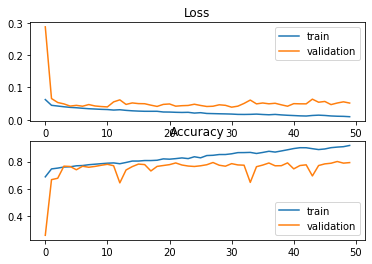

In [35]:
import matplotlib.pyplot as plt
import pickle

with open("/content/TL_history_dict", "rb") as pickle_file:
    history = pickle.load(pickle_file)

    # plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='validation')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history['accuracy'], label='train')
    plt.plot(history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

###### Testing the model and visualizing the results

In [12]:
from keras.models import model_from_json

# Load trained model
print("Loading model...")
json_file = open('/content/TL_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/TL_model.h5")
print("Model loaded!")

Loading model...
Model loaded!


In [0]:
def plot_results(x_test, y_test, masks):
  fig = plt.figure(figsize=(35,20))
  ax = fig.subplots(3, 5)

  indices = [0, 15, 23, 30, 40]

  i = 0
  for index in indices:
      image = x_test[index]
      real_mask = y_test[index]
      predicted_mask = masks[index]
      
      ax[0,i].imshow(image)
      ax[0,i].axis('off')
      ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
      ax[1,i].imshow(real_mask)
      ax[1,i].axis('off')
      ax[1,i].set_title('Original Class Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
      ax[2,i].imshow(predicted_mask)
      ax[2,i].axis('off')
      ax[2,i].set_title('Predicted Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
      i += 1
        
  plt.show()

In [0]:
# load test data
print("Loading test data...")
x_test, y_test, y_test_f = load_test_data()

Loading test data...
Predicting...
Formatting 20 masks...
Plotting...


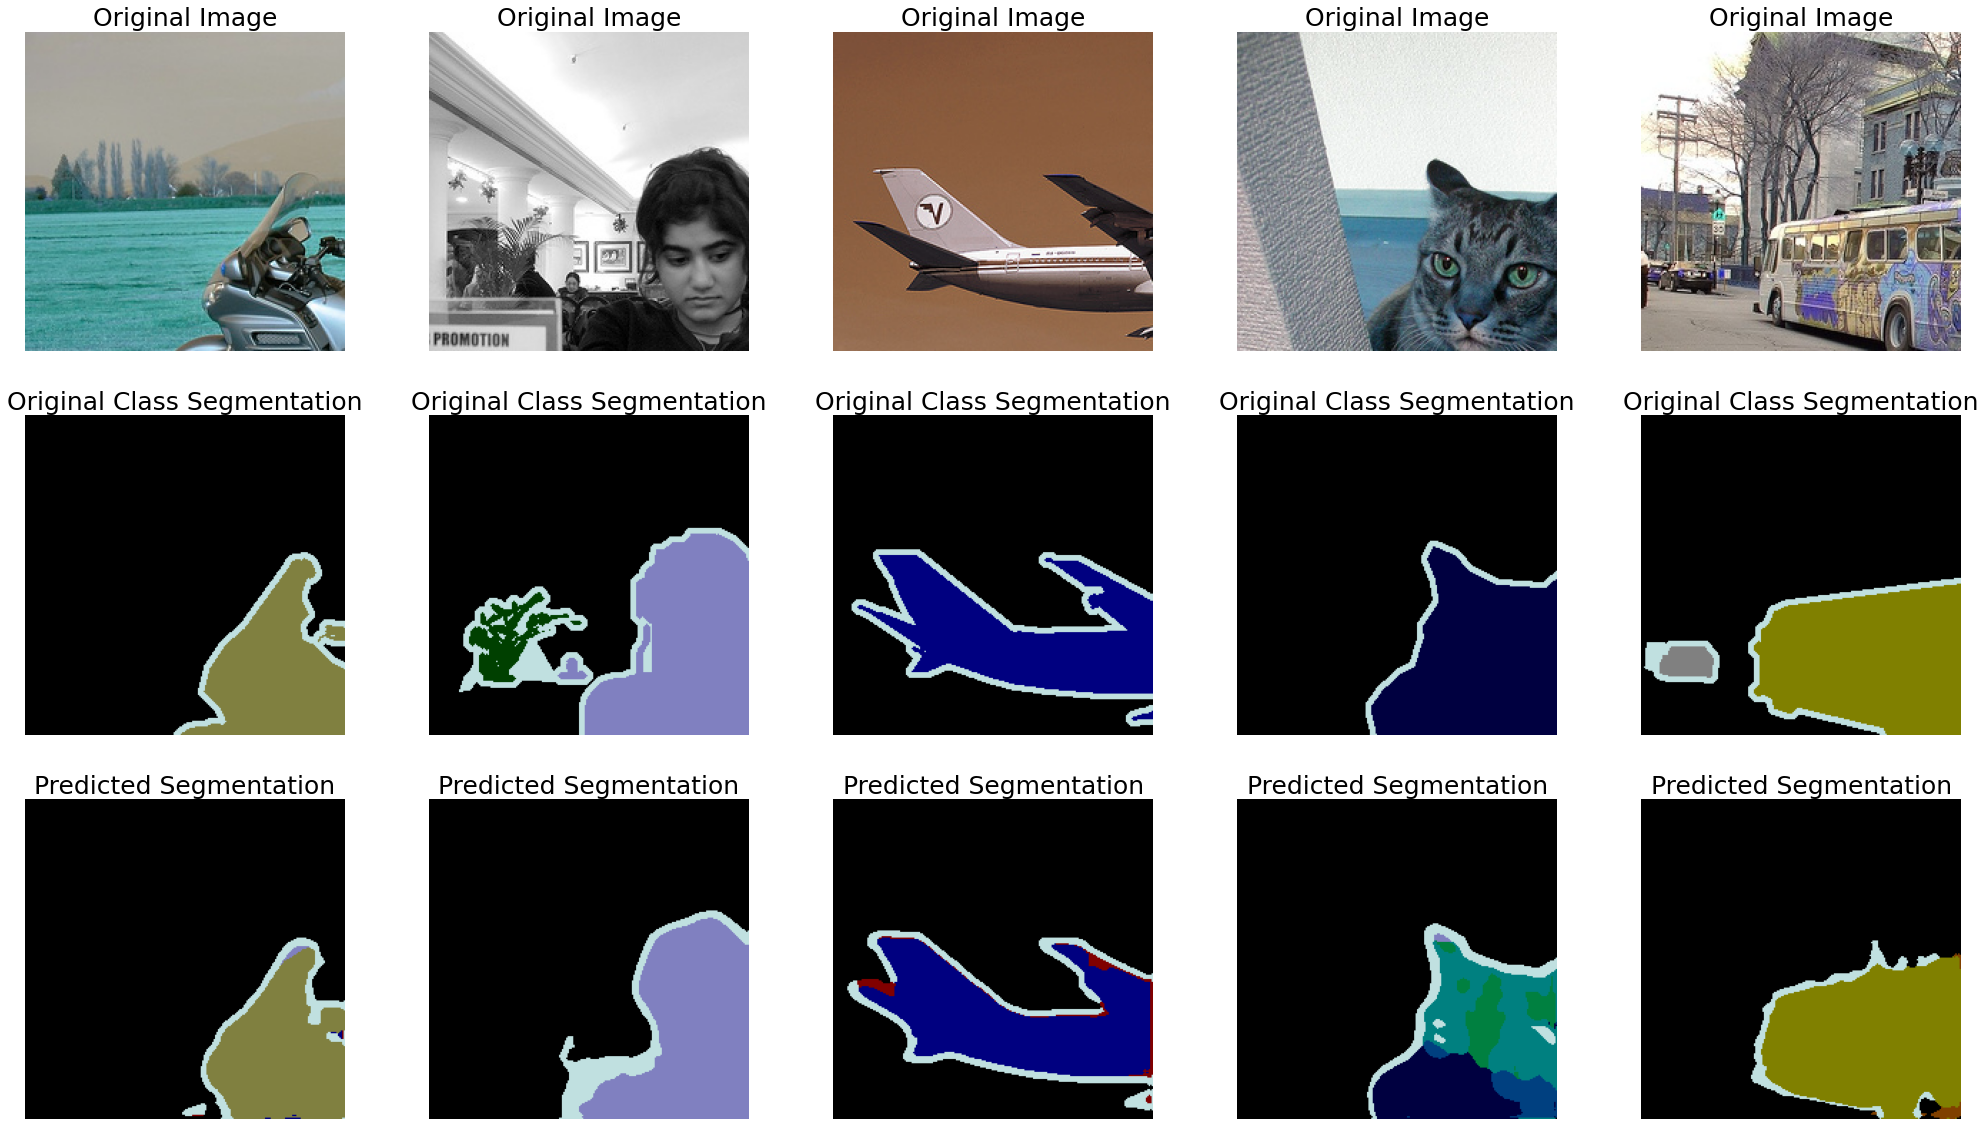

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import segmentation_models as sm

BACKBONE = 'resnet18'
preprocess_input = sm.get_preprocessing(BACKBONE)

x_test = preprocess_input(x_test)

print("Predicting...")
predicted_masks = model.predict(x_test)

palette = [[0, 0, 0], #background
             
              [0, 0, 64],
              [0, 0, 128],
              [0, 0, 192],
              [0, 64, 0],
              [0, 128, 0],
              [0, 192, 0],
              [0, 64, 128],
              [0, 128, 64],
              [0, 128, 128],
              [0, 128, 192],
              [0, 192, 128],
              [128, 0, 0],
              [128, 0, 64],
              [128, 0, 128],
              [128, 0, 192],
              [128, 64, 0],
              [128, 128, 0],
              [128, 128, 64],
              [128, 128, 128],
              [128, 128, 192],
             
              [192, 224, 224], # separating line
              [255, 255, 255]] # unlabelled

print("Formatting 20 masks...")
mask_images = np.zeros((predicted_masks.shape[0], predicted_masks.shape[1], predicted_masks.shape[2], 3), dtype=np.uint8)
for i in range(50):
  for x in range(len(predicted_masks[i])):
    for y in range(len(predicted_masks[i][x])):
      agm = np.argmax(predicted_masks[i][x][y])
      mask_images[i][x][y] = np.array(palette[agm])

print("Plotting...")
plot_results(x_test, y_test, mask_images)

In [48]:
from keras.metrics import categorical_accuracy

categorical_loss = sm.losses.CategoricalCELoss() 
print(model)
model.compile(
    'Adam',
    loss=categorical_loss,
    metrics=[categorical_accuracy, "accuracy"],
  )
# evaluate the model on the test data
loss, cat_accuracy, accuracy = model.evaluate(x_test, y_test_f, verbose=0)
print(metrics)
print('Test categorical accuracy: %.3f' % (cat_accuracy))
print('Test categorical crossentropy loss: %.3f' % (loss))

[0.054578524194817686, 0.789790153503418, 0.789790153503418]
Test categorical accuracy: 0.790
Test categorical crossentropy loss: 0.055


##### TO DELETE Predicting using a pretrained model (B)

We can now use the model. We used a PSPnet model pretrained on the Pascal VOC 2012 dataset for this task.

The final accuracy is really good, compared to our model built from scratch.

In [0]:
# Install the required toolkit and show its info
!pip install keras-segmentation
!pip show keras-segmentation

In [0]:
from keras_segmentation.pretrained import pspnet_101_cityscapes
from keras_segmentation.predict import predict_multiple
import os

# load the pretrained model trained on Pascal VOC 2012 dataset
model = pspnet_101_cityscapes()

# serialize model to JSON
model_json = model.to_json()
with open("/content/pretrained-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/pretrained-model.h5")
print("Saved model to disk")

# Create output directory
test_out_path = "/content/segmentation_dataset/test/out/"
os.makedirs(test_out_path, exist_ok=True)

# Predict on all test images
predict_multiple( 
  model=model, 
  inp_dir=test_images_path, 
  out_dir=test_out_path 
)

264151040/264145248 [==============================] - 6s 0us/step


  0%|          | 0/219 [00:00<?, ?it/s]

Saved model to disk


100%|██████████| 219/219 [37:22<00:00, 10.24s/it]


[array([[ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [13, 13, 13, ..., 13, 13, 13],
        [13, 13, 13, ..., 13, 13, 13],
        [13, 13, 13, ..., 13, 13, 13]]), array([[10, 10, 10, ...,  2,  2,  2],
        [10, 10, 10, ...,  2,  2,  2],
        [10, 10, 10, ...,  2,  2,  2],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]), array([[11, 11, 11, ...,  2,  2,  2],
        [11, 11, 11, ...,  2,  2,  2],
        [11, 11, 11, ...,  2,  2,  2],
        ...,
        [ 0,  0,  0, ..., 11, 11, 11],
        [ 0,  0,  0, ..., 11, 11, 11],
        [ 0,  0,  0, ..., 11, 11, 11]]), array([[ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [15, 15, 15, ...,  0,  0,  0],
        [15, 15, 15, ...,  0,  0,  0],
        [15, 15, 15, ...,  0,  0,  0]]), array([

We can now compare some of the predictions to the real segmentation images:

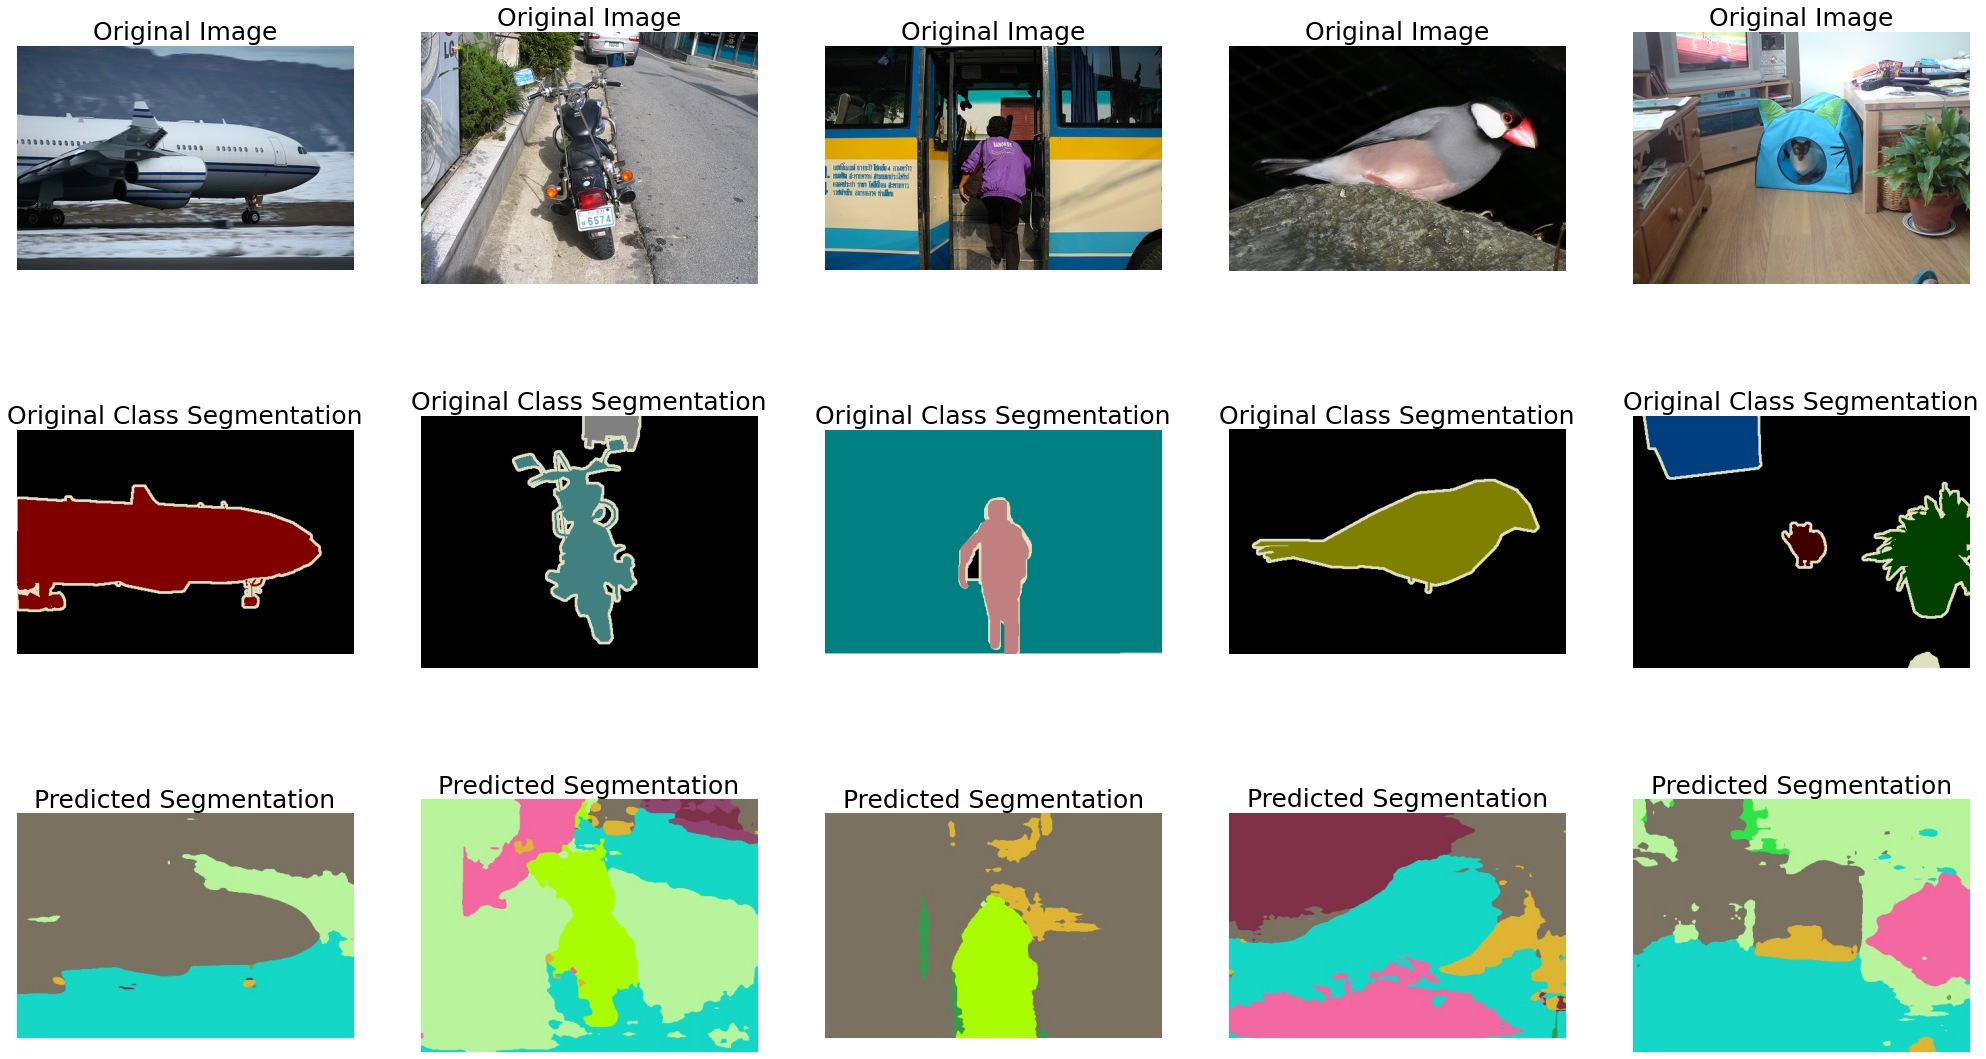

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir

image_path = "/content/segmentation_dataset/test/images/"
segment_path = "/content/segmentation_dataset/test/segments/"
prediction_path = "/content/segmentation_dataset/test/out/"

names = listdir(prediction_path)

fig = plt.figure(figsize=(35,20))
ax = fig.subplots(3, 5)
for i in range(5):
  image = mpimg.imread(image_path + names[i])

  segment_name = names[i][:-3] + "png"
  segment = mpimg.imread(segment_path + segment_name)
  prediction = mpimg.imread(prediction_path + names[i])
    
  ax[0,i].imshow(image)
  ax[0,i].axis('off')
  ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
  ax[1,i].imshow(segment)
  ax[1,i].axis('off')
  ax[1,i].set_title('Original Class Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
  ax[2,i].imshow(prediction)
  ax[2,i].axis('off')
  ax[2,i].set_title('Predicted Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
   
plt.show()

##### TO DELETE Fine tuning the model(optional)

This results can even be improved by fine-tuning the model with our dataset. However we wont execute this code as the training times are long. It is left here as a proof of concept.

First, we need to download a pre-formatted dataset. In this pre-formatted dataset each pixel value corresponds to the pixel class, as opposed to the pixel index(which was the case in the original dataset).

In [0]:
import requests
import cv2
import os
from os import listdir
import numpy as np

def download_formatted_segments():
  base_url = 'https://raw.githubusercontent.com/systemallica/cv_datasets/master/segments-formatted/'

  train_segments_path_formatted = "/content/segmentation_dataset/train/segments-formatted/"
  os.makedirs(train_segments_path_formatted, exist_ok=True)
  
  val_segments_path_formatted = "/content/segmentation_dataset/val/segments-formatted/"
  os.makedirs(val_segments_path_formatted, exist_ok=True)

  print("Downloading training segments...")
  i = 0
  total = len(listdir(train_segments_path))
  for f in listdir(train_segments_path):
    print(str(i)+"/"+str(total))

    # Skip if image already formatted
    if(os.path.isfile(train_segments_path_formatted + f)):
      i += 1
      continue
    
    if f == ".ipynb_checkpoints":
      i += 1
      continue

    specific_file = base_url + f
    r = requests.get(specific_file)
    nparr = np.asarray(bytearray(r.content), dtype="uint8")
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    cv2.imwrite(train_segments_path_formatted + f, image)
    i +=1

  print("Downloading validation segments...")
  i = 0
  total = len(listdir(val_segments_path))
  for f in listdir(val_segments_path):
    print(str(i)+"/"+str(total))

    # Skip if image already formatted
    if(os.path.isfile(val_segments_path_formatted + f)):
      i += 1
      continue
    
    if f == ".ipynb_checkpoints":
      i += 1
      continue

    specific_file = base_url + f
    r = requests.get(specific_file)
    nparr = np.asarray(bytearray(r.content), dtype="uint8")
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    cv2.imwrite(val_segments_path_formatted + f, image)
    i +=1
  print("All done!")

download_formatted_segments()

0/962
1/962
2/962
3/962
4/962
5/962
6/962
7/962
8/962
9/962
10/962
11/962
12/962
13/962
14/962
15/962
16/962
17/962
18/962
19/962
20/962
21/962
22/962
23/962
24/962
25/962
26/962
27/962
28/962
29/962
30/962
31/962
32/962
33/962
34/962
35/962
36/962
37/962
38/962
39/962
40/962
41/962
42/962
43/962
44/962
45/962
46/962
47/962
48/962
49/962
50/962
51/962
52/962
53/962
54/962
55/962
56/962
57/962
58/962
59/962
60/962
61/962
62/962
63/962
64/962
65/962
66/962
67/962
68/962
69/962
70/962
71/962
72/962
73/962
74/962
75/962
76/962
77/962
78/962
79/962
80/962
81/962
82/962
83/962
84/962
85/962
86/962
87/962
88/962
89/962
90/962
91/962
92/962
93/962
94/962
95/962
96/962
97/962
98/962
99/962
100/962
101/962
102/962
103/962
104/962
105/962
106/962
107/962
108/962
109/962
110/962
111/962
112/962
113/962
114/962
115/962
116/962
117/962
118/962
119/962
120/962
121/962
122/962
123/962
124/962
125/962
126/962
127/962
128/962
129/962
130/962
131/962
132/962
133/962
134/962
135/962
136/962
137/962
138/96

We can now proceed to train our pre-trained model with our dataset.

Then we use this model with the test images and display the results.

In [0]:
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.pretrained import pspnet_101_voc12
from keras_segmentation.models.pspnet import pspnet_101
import os

def finetune_model():
  train_segments_path_formatted = "/content/segmentation_dataset/train/segments-formatted/"
  os.makedirs(train_segments_path_formatted, exist_ok=True)
  
  val_segments_path_formatted = "/content/segmentation_dataset/val/segments-formatted/"
  os.makedirs(val_segments_path_formatted, exist_ok=True)
  
  pretrained_model = pspnet_101_voc12()

  # 21 classes + background + unlabeled
  new_model = pspnet_101(n_classes=23)

  # transfer weights from pre-trained model to your model
  transfer_weights(pretrained_model, new_model) 

  # create checkpoint path
  weights_path = "/content/segmentation_dataset/weights/"
  os.makedirs(weights_path, exist_ok=True)

  new_model.train(
      train_images = train_images_path,
      train_annotations = train_segments_path_formatted,
      checkpoints_path = weights_path,
      epochs=3
  )

  # Create output directory
  test_out_path = "/content/segmentation_dataset/test/out-finetuned/"
  os.makedirs(test_out_path, exist_ok=True)

  # Predict on all test images
  predict_multiple( 
    model=model, 
    inp_dir=test_images_path, 
    out_dir=test_out_path 
  )

finetune_model()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir

image_path = "/content/segmentation_dataset/test/images/"
segment_path = "/content/segmentation_dataset/test/segments/"
prediction_path = "/content/segmentation_dataset/test/out-finetuned/"

names = listdir(prediction_path)

fig = plt.figure(figsize=(35,20))
ax = fig.subplots(3, 5)
for i in range(5):
  image = mpimg.imread(image_path + names[i])

  segment_name = names[i][:-3] + "png"
  segment = mpimg.imread(segment_path + segment_name)
  prediction = mpimg.imread(prediction_path + names[i])
    
  ax[0,i].imshow(image)
  ax[0,i].axis('off')
  ax[0,i].set_title('Original Image', fontdict={'fontsize': 25, 'fontweight': 'medium'})
  ax[1,i].imshow(segment)
  ax[1,i].axis('off')
  ax[1,i].set_title('Original Class Segmentation', fontdict={'fontsize': 25, 'fontweight': 'medium'})
  ax[2,i].imshow(prediction)
  ax[2,i].axis('off')
  ax[2,i].set_title('Finetuned prediction', fontdict={'fontsize': 25, 'fontweight': 'medium'})
   
plt.show()

FileNotFoundError: ignored